house priising system

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

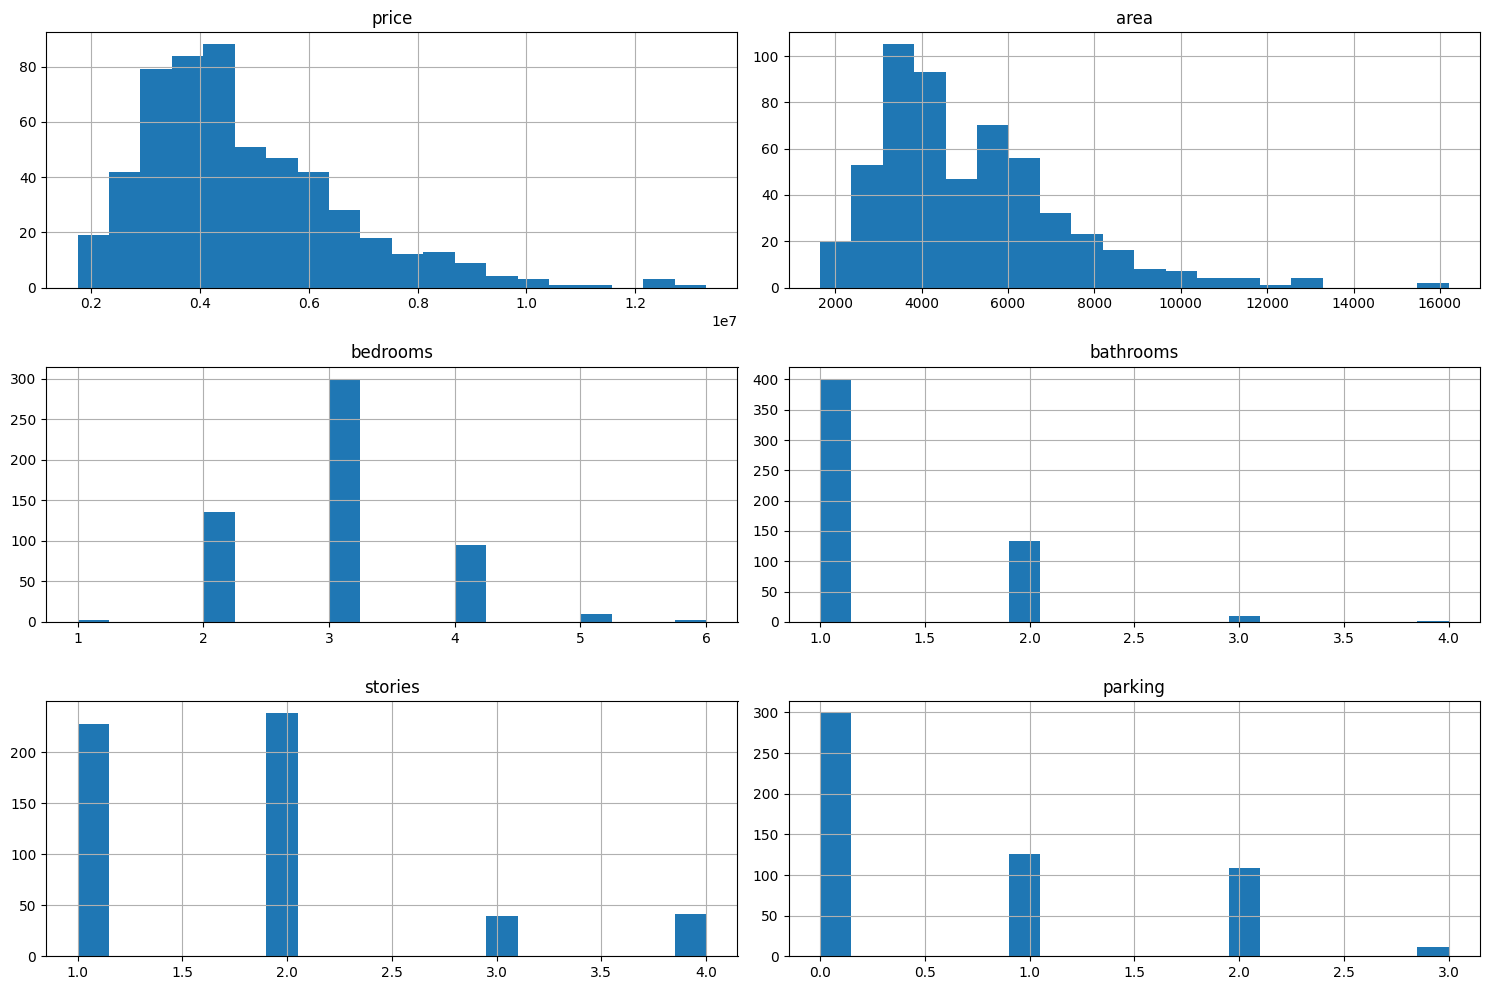

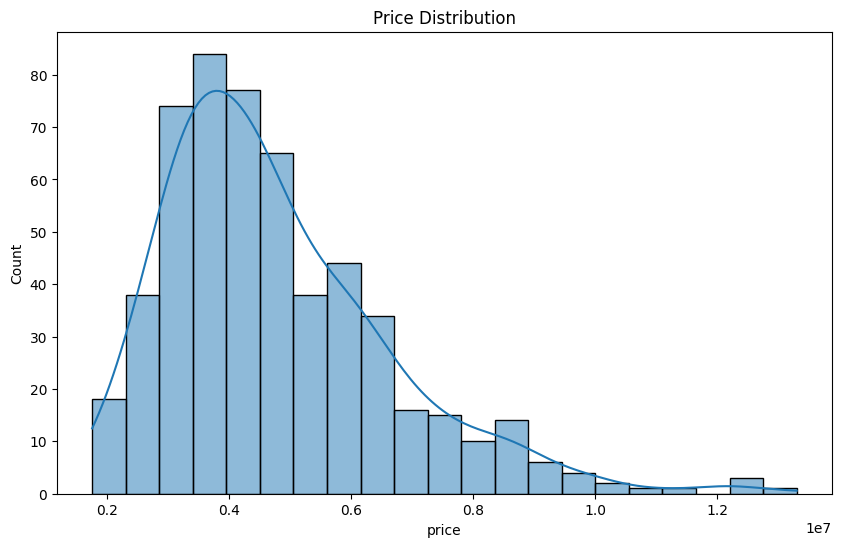

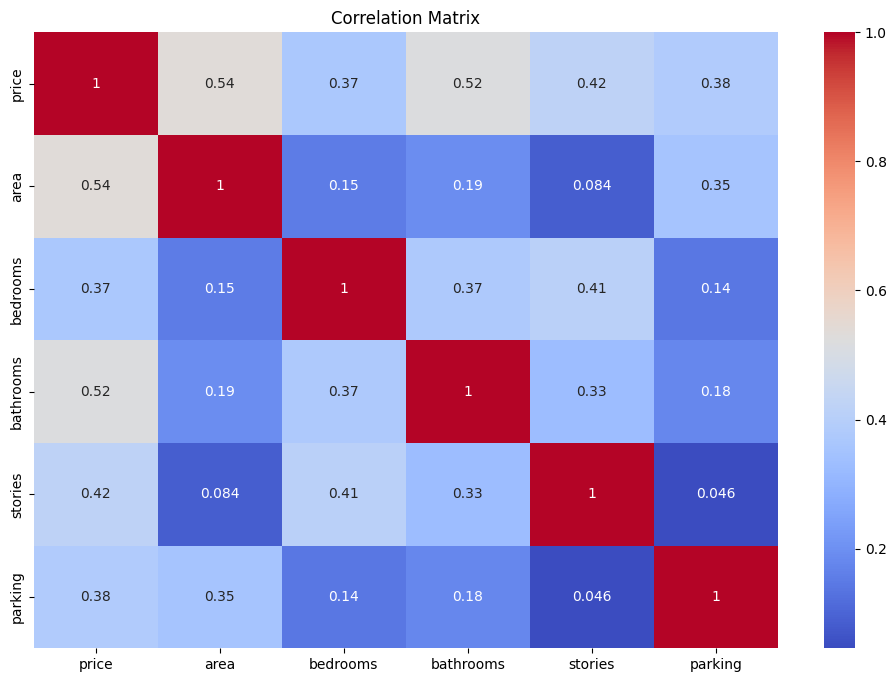

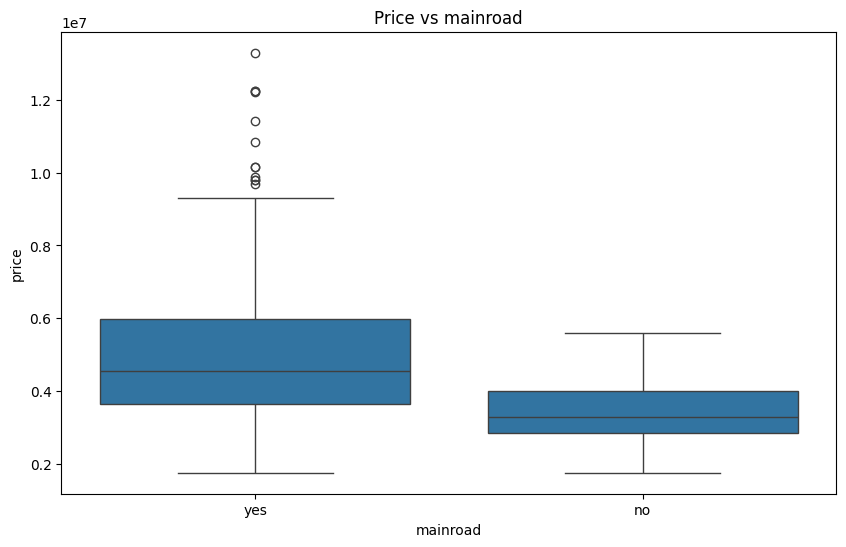

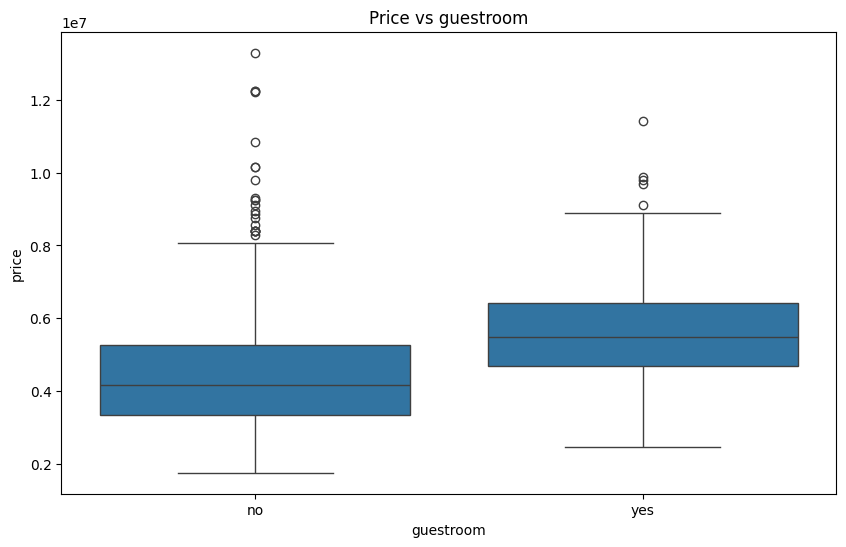

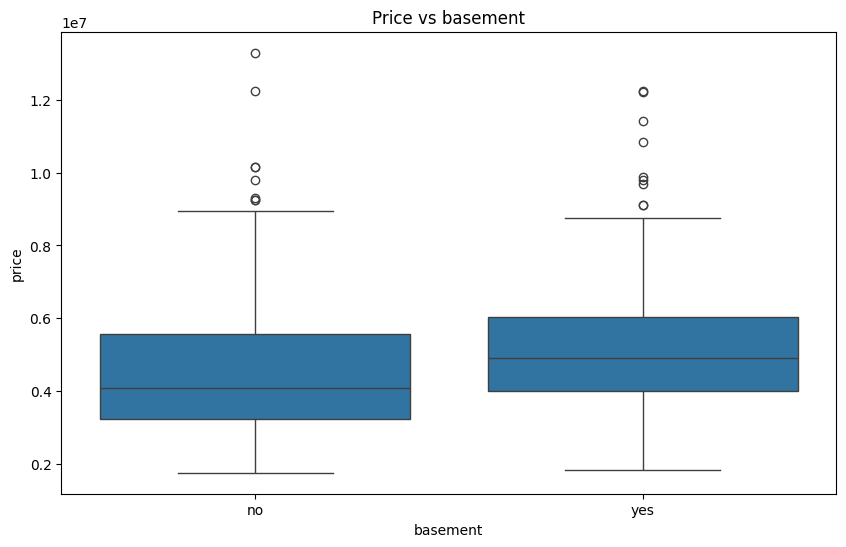

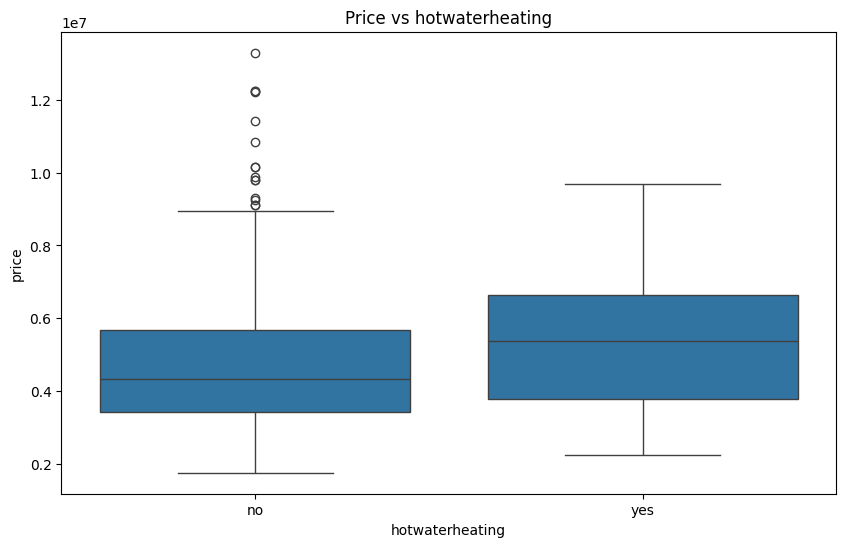

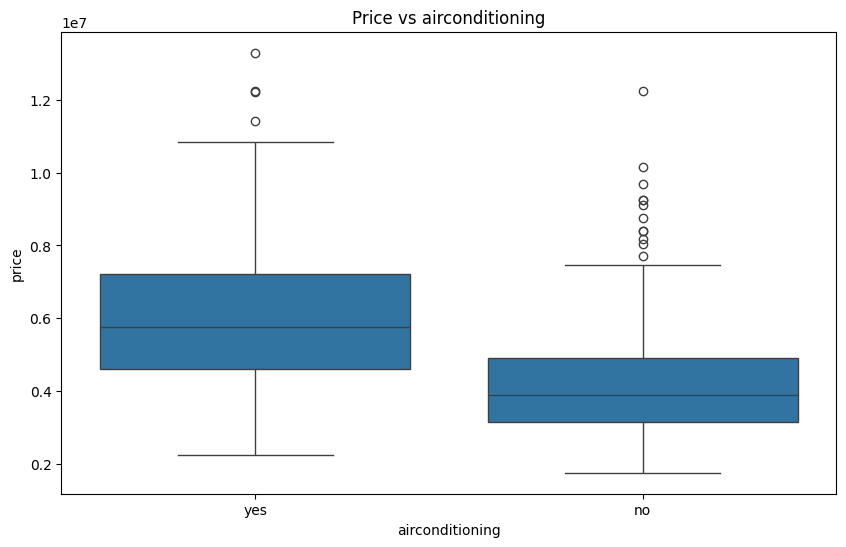

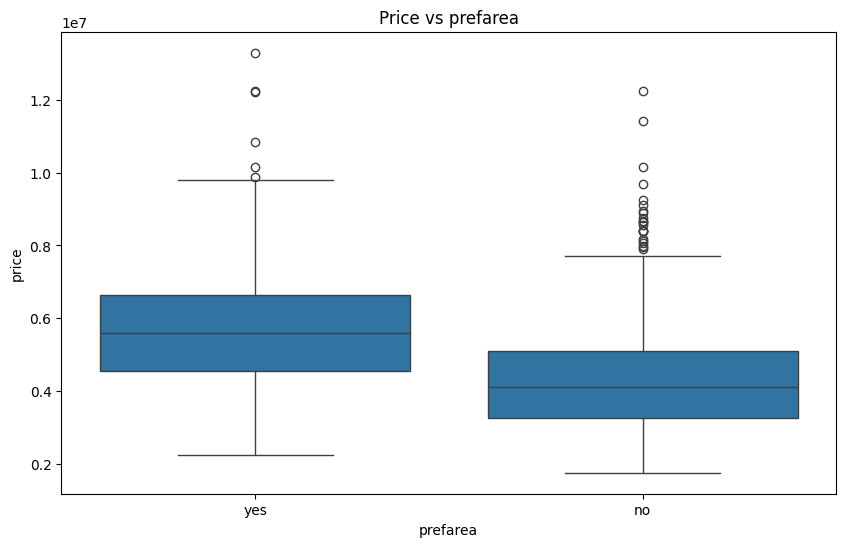

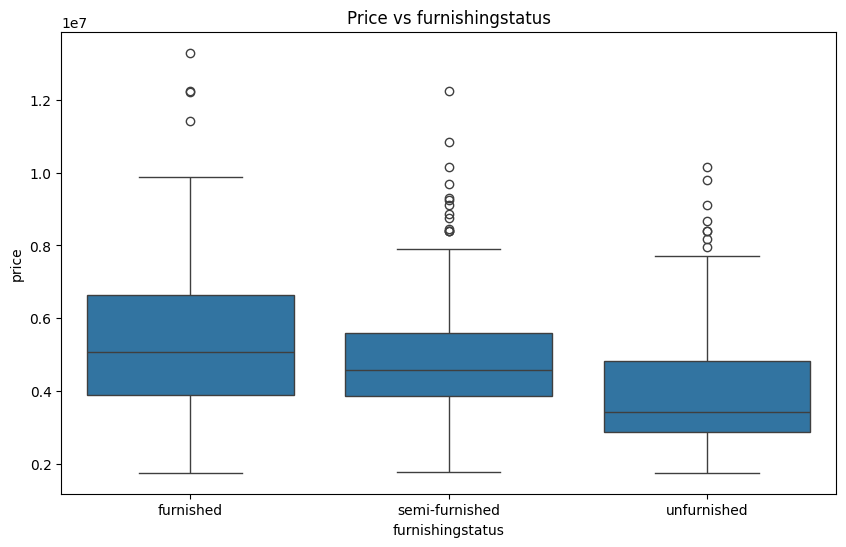

In [4]:
# Plot distributions of numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Categorical features analysis
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature}')
    plt.show()

In [5]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    # Print results
    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")

# Compare models
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression Results:
MAE: 970043.40
MSE: 1754318687330.67
RMSE: 1324506.96
R2 Score: 0.65

Ridge Results:
MAE: 970724.38
MSE: 1756731438876.36
RMSE: 1325417.46
R2 Score: 0.65

Lasso Results:
MAE: 970045.01
MSE: 1754323091682.87
RMSE: 1324508.62
R2 Score: 0.65

Random Forest Results:
MAE: 1025961.17
MSE: 1971006449235.81
RMSE: 1403925.37
R2 Score: 0.61

Gradient Boosting Results:
MAE: 967703.11
MSE: 1690063368592.24
RMSE: 1300024.37
R2 Score: 0.67

                            MAE           MSE          RMSE        R2
Linear Regression  9.700434e+05  1.754319e+12  1.324507e+06  0.652924
Ridge              9.707244e+05  1.756731e+12  1.325417e+06  0.652447
Lasso              9.700450e+05  1.754323e+12  1.324509e+06  0.652923
Random Forest      1.025961e+06  1.971006e+12  1.403925e+06  0.610055
Gradient Boosting  9.677031e+05  1.690063e+12  1.300024e+06  0.665637


In [7]:
# Example for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2:", r2_score(y_test, y_pred))

Best parameters: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best score: 1100410.6789215815
Test RMSE: 1435049.4774376494
Test R2: 0.5925732748145676


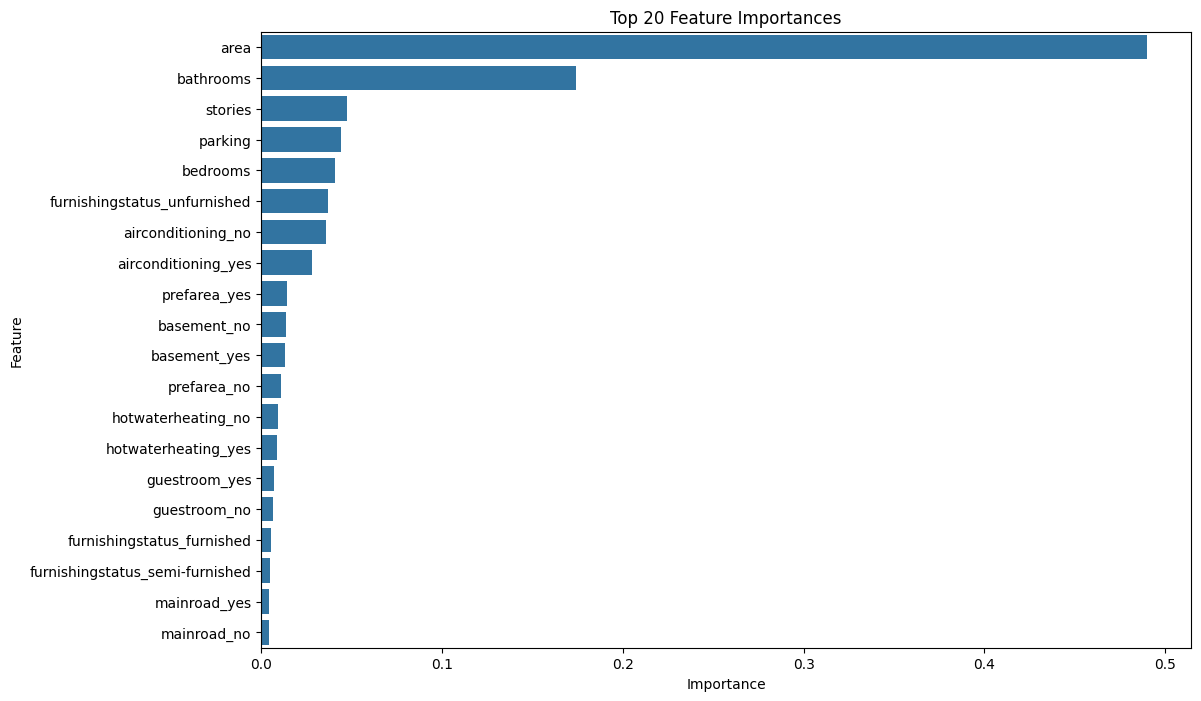

In [8]:
# Get feature names after preprocessing
preprocessor.fit(X_train)
feature_names = (numerical_features + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

# Get feature importances from the best model (Random Forest in this case)
importances = best_model.named_steps['model'].feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [9]:
def predict_house_price(model, area, bedrooms, bathrooms, stories, mainroad, 
                       guestroom, basement, hotwaterheating, airconditioning, 
                       parking, prefarea, furnishingstatus):
    """
    Predict house price based on input features.
    
    Args:
        model: Trained model pipeline
        All other args: House features
        
    Returns:
        Predicted price
    """
    # Create a DataFrame from the input features
    data = {
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'mainroad': [mainroad],
        'guestroom': [guestroom],
        'basement': [basement],
        'hotwaterheating': [hotwaterheating],
        'airconditioning': [airconditioning],
        'parking': [parking],
        'prefarea': [prefarea],
        'furnishingstatus': [furnishingstatus]
    }
    
    df = pd.DataFrame(data)
    
    # Make prediction
    prediction = model.predict(df)
    
    return prediction[0]

# Example usage
predicted_price = predict_house_price(
    model=best_model,
    area=6000,
    bedrooms=3,
    bathrooms=2,
    stories=2,
    mainroad='yes',
    guestroom='no',
    basement='yes',
    hotwaterheating='no',
    airconditioning='yes',
    parking=2,
    prefarea='yes',
    furnishingstatus='furnished'
)

print(f"Predicted Price: {predicted_price:,.2f}")

Predicted Price: 8,164,067.28


In [10]:
import joblib

# Save the model
joblib.dump(best_model, 'house_price_predictor.pkl')

# Load the model (in a new session)
loaded_model = joblib.load('house_price_predictor.pkl')

In [1]:
# Install streamlit first: pip install streamlit
# Save this as app.py and run with: streamlit run app.py

import streamlit as st
import joblib

# Load the model
model = joblib.load('house_price_predictor.pkl')

st.title('House Price Prediction System')

st.header('Enter House Details')

area = st.number_input('Area (sq.ft)', min_value=1000, max_value=20000, value=6000)
bedrooms = st.selectbox('Bedrooms', [1, 2, 3, 4, 5, 6])
bathrooms = st.selectbox('Bathrooms', [1, 2, 3, 4])
stories = st.selectbox('Stories', [1, 2, 3, 4])
mainroad = st.radio('Near Main Road', ['yes', 'no'])
guestroom = st.radio('Guest Room', ['yes', 'no'])
basement = st.radio('Basement', ['yes', 'no'])
hotwaterheating = st.radio('Hot Water Heating', ['yes', 'no'])
airconditioning = st.radio('Air Conditioning', ['yes', 'no'])
parking = st.selectbox('Parking Spaces', [0, 1, 2, 3])
prefarea = st.radio('Preferred Area', ['yes', 'no'])
furnishingstatus = st.selectbox('Furnishing Status', ['furnished', 'semi-furnished', 'unfurnished'])

if st.button('Predict Price'):
    prediction = predict_house_price(
        model=model,
        area=area,
        bedrooms=bedrooms,
        bathrooms=bathrooms,
        stories=stories,
        mainroad=mainroad,
        guestroom=guestroom,
        basement=basement,
        hotwaterheating=hotwaterheating,
        airconditioning=airconditioning,
        parking=parking,
        prefarea=prefarea,
        furnishingstatus=furnishingstatus
    )
    
    st.success(f'Predicted House Price: ₹{prediction:,.2f}')

2025-07-02 10:20:51.959 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20:52.878 
  command:

    streamlit run c:\Users\payak\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-02 10:20:52.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20:52.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20:52.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20:52.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20:52.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 10:20: